In [11]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydantic_settings import BaseSettings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib
import streamlit as st
%matplotlib inline 

In [12]:
# Step 2: Load and Explore Dataset
data = pd.read_csv("C:/Users/nabil/Downloads/expressochurn/Expresso_churn_dataset.csv")  # Replace with your dataset file
print(data.head())  # Display the first few rows
print(data.info())  # General info
print(data.describe())  # Summary statistics

                                    user_id  REGION         TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month      NaN   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             NaN      NaN           NaN        NaN          NaN     NaN   
2             2.0   1020.0         340.0        2.0          NaN    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0          NaN    39.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                       

In [13]:
data.drop('user_id',axis=1,inplace=True)  # droping the user_id column
data

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [14]:
# Step 3: Handle Missing and Corrupted Values
# Impute missing numerical values with mean
numerical_columns = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy="mean")
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [15]:
# Impute missing categorical values with mode
categorical_columns = data.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

C:\Users\nabil\AppData\Local\Temp\ipykernel_23940\594048984.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [16]:
# Step 4: Remove Duplicates
data.drop_duplicates(inplace=True)

In [14]:
def display(df):
    print(f'messing values :\n{df.isnull().sum()}')
    print(f'number of duplicated rows :\n{df.duplicated().sum()}')
    print(f'data shape :\n{df.shape}')
    unique_rows = df.drop_duplicates()
    print(f"Number of unique rows: {unique_rows.shape[0]}")
    print(f'data describe :\n{df.describe()}')
    
display(data)    

messing values :
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64
number of duplicated rows :
0
data shape :
(1503504, 18)
Number of unique rows: 1503504
data describe :
            MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT     FREQUENCE  \
count  1.503504e+06    1.503504e+06  1.503504e+06  1.503504e+06  1.503504e+06   
mean   5.603741e+03    1.167422e+01  5.583555e+03  1.861191e+03  1.415090e+01   
std    6.827928e+03    1.273616e+01  6.975785e+03  2.325258e+03  1.424142e+01   
min    1.000000e+01    1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.250000e+03    3.000000e+00  1.099000e+03  3.660000e+02  4.000000e+00   
50%    3.700000e+03 

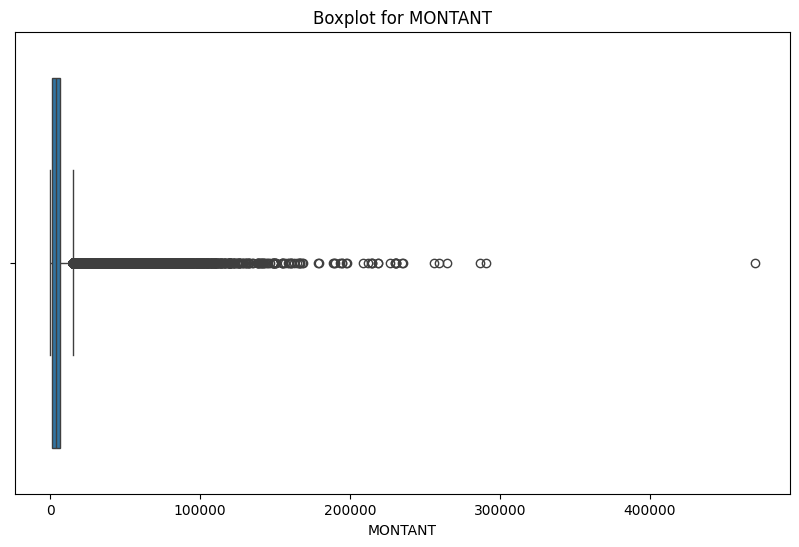

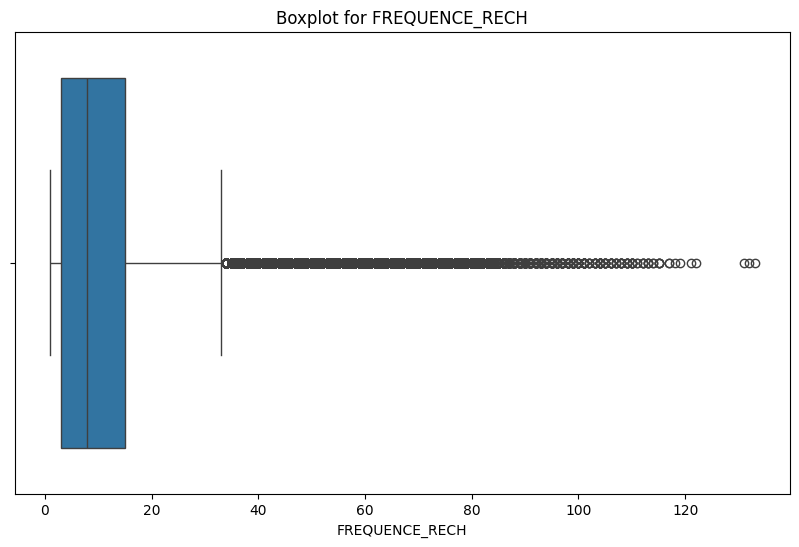

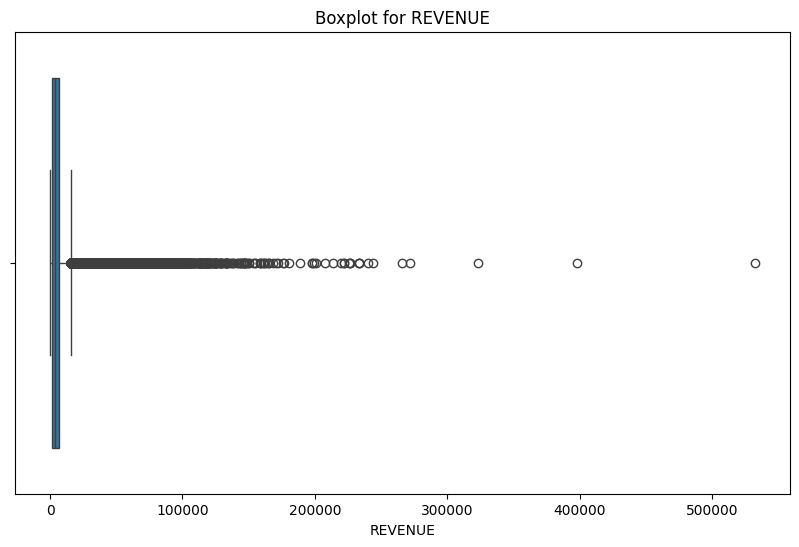

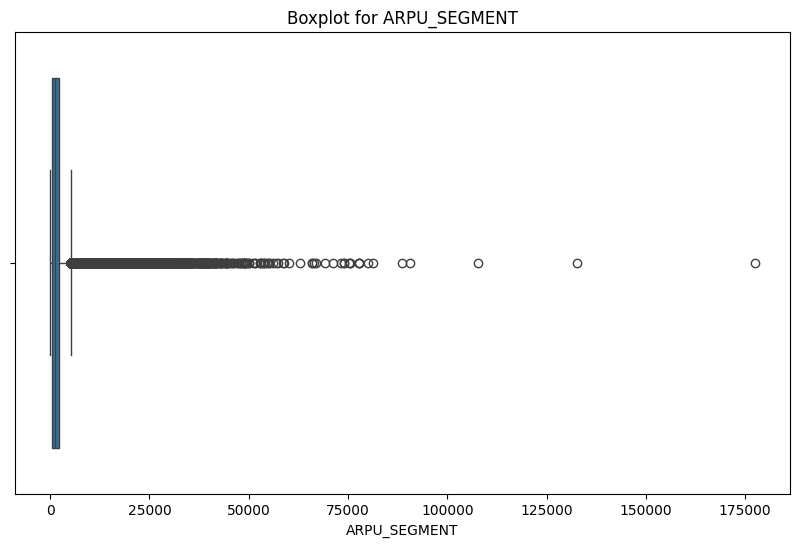

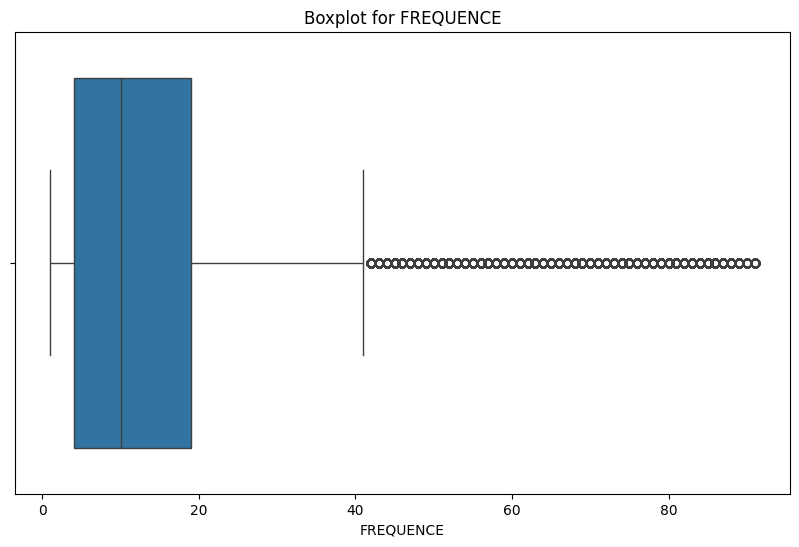

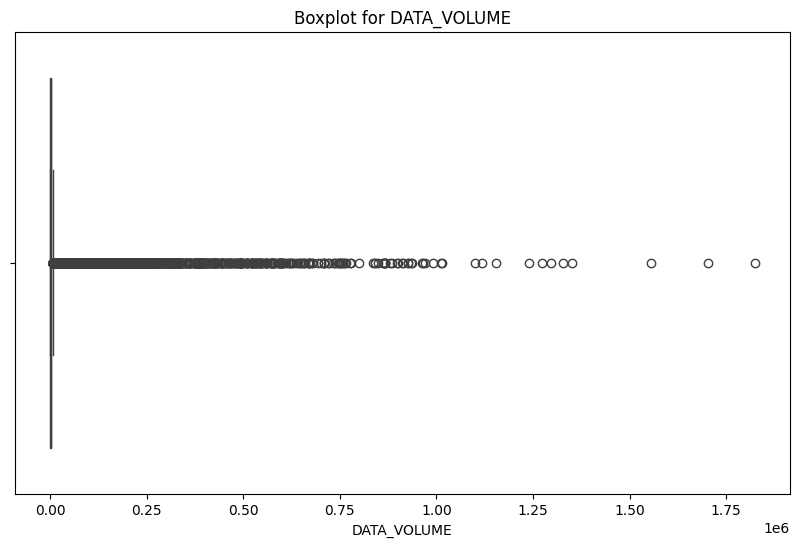

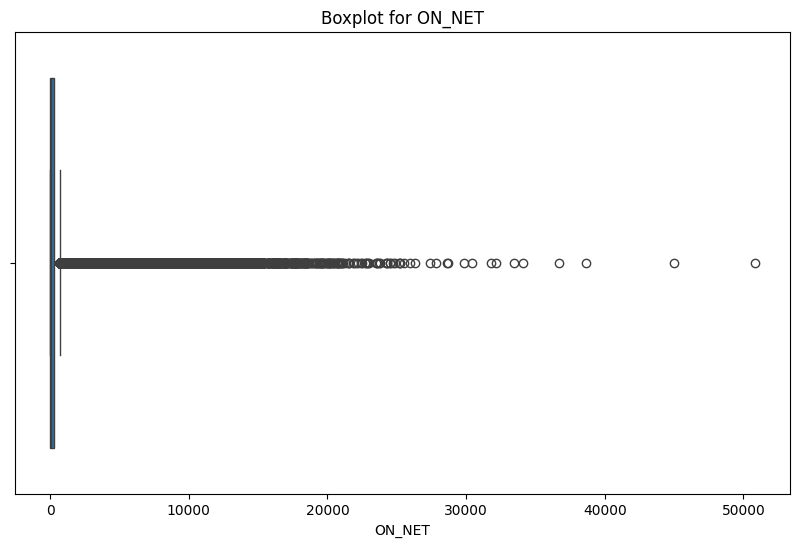

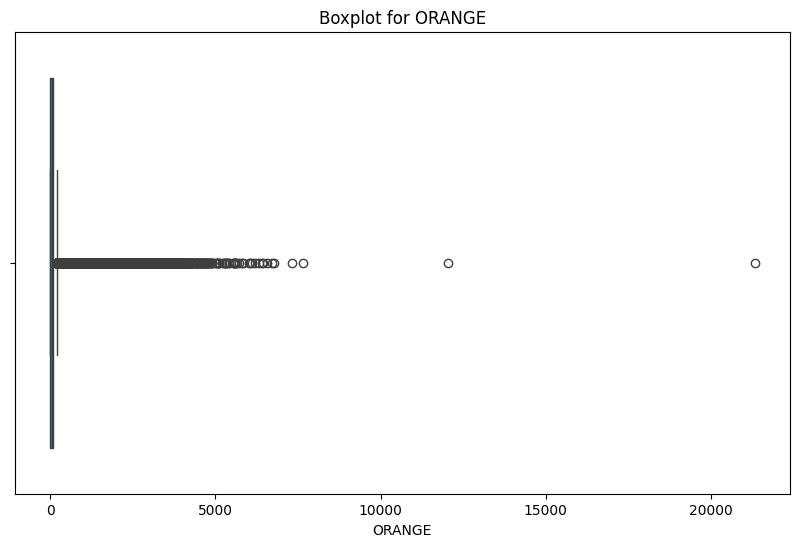

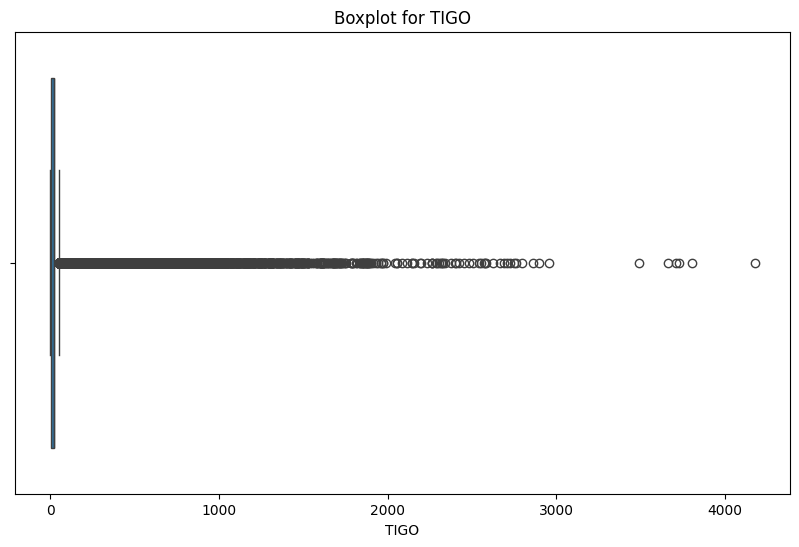

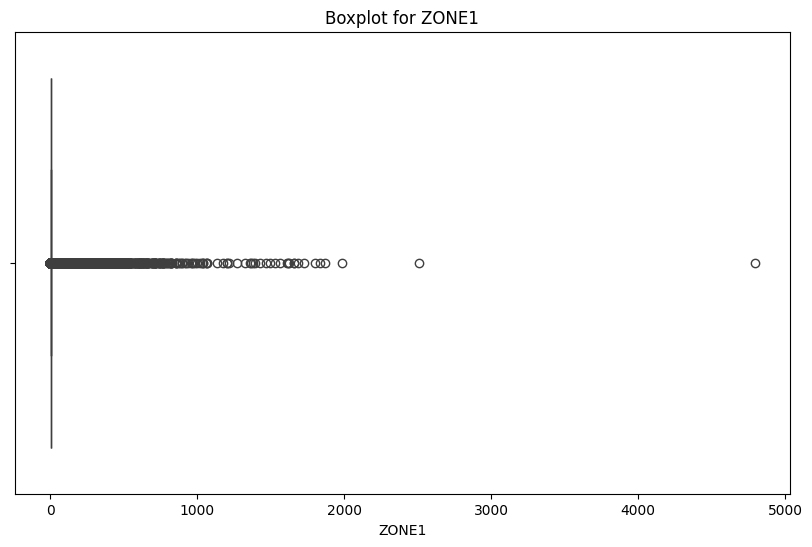

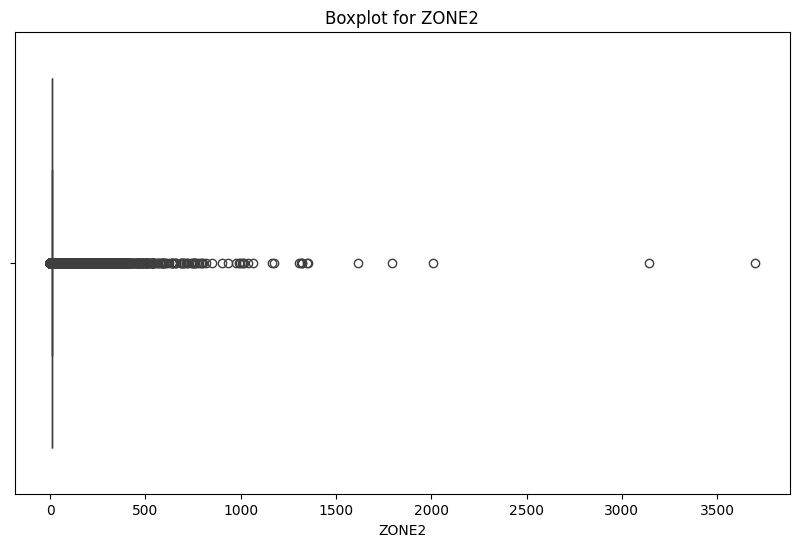

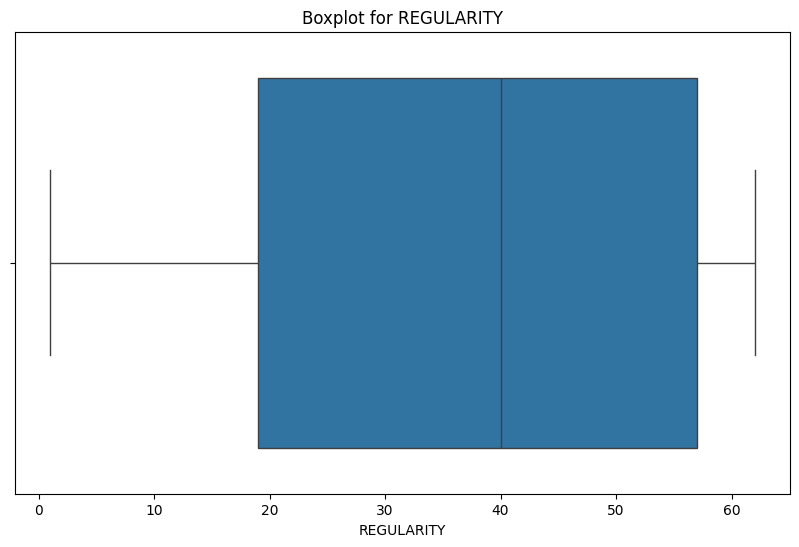

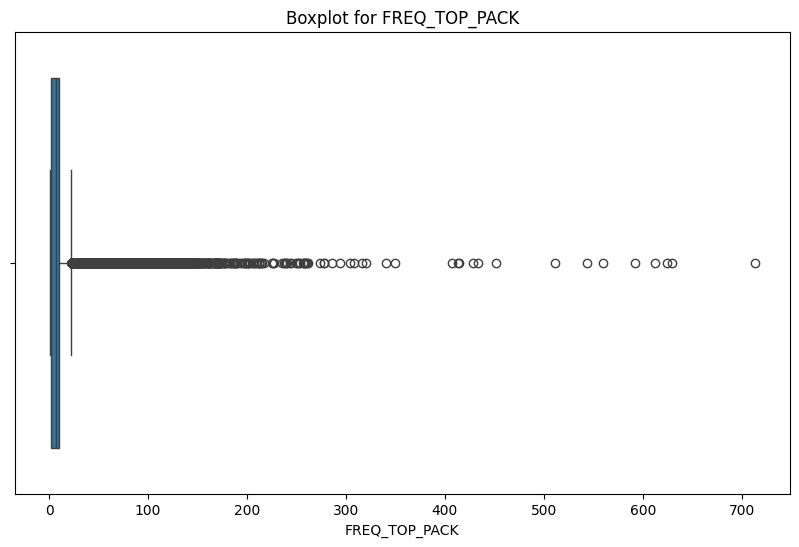

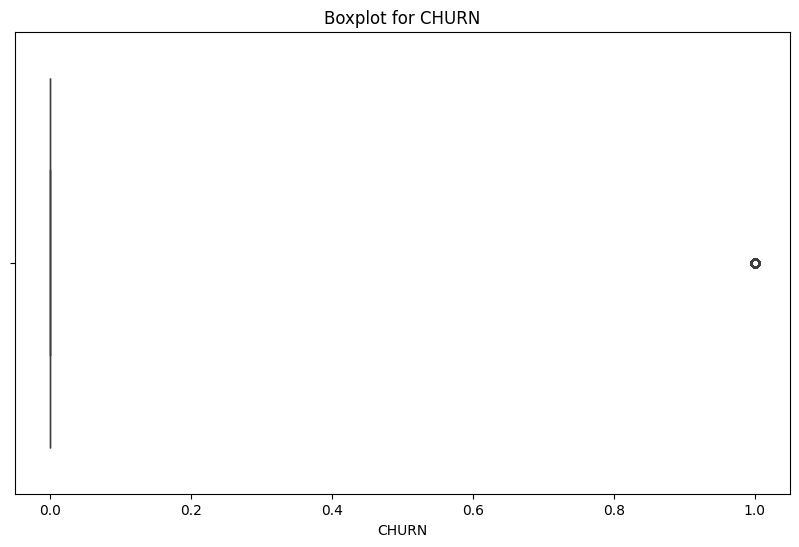

In [17]:
numerical_data = data[numerical_columns]

for col in numerical_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=numerical_data[col])
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()


In [16]:
data.shape

(1503504, 18)

In [18]:
from sklearn.preprocessing import RobustScaler

# Apply RobustScaler
scaler = RobustScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [18]:
data.shape

(865338, 18)

In [19]:
# Step 6: Encode Categorical Features
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [20]:
round(data.describe())

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0,1503504.0
mean,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.0,50.0,0.0,0.0
std,5.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,3.0,14.0,10.0,0.0,1.0,38.0,1.0,0.0
min,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,-1.0,-8.0,-8.0,0.0,-1.0,0.0,-1.0,0.0
25%,0.0,7.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-1.0,0.0,0.0,0.0,-1.0,18.0,-1.0,0.0
50%,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,0.0
75%,7.0,7.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0
max,13.0,7.0,83.0,10.0,90.0,90.0,5.0,547.0,188.0,249.0,229.0,4784.0,3689.0,0.0,1.0,139.0,88.0,1.0


In [21]:
# Step 7: Train and Test Machine Learning Classifier
X = data.drop("CHURN", axis=1)  # Replace 'target' with the actual target column name
y = data["CHURN"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Test Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9338878154711824


In [22]:
# Save model as a pkl extantion
joblib.dump(model, 'churning_model.pkl')

['churning_model.pkl']

In [23]:
# Load the model
import joblib
model = joblib.load('churning_model.pkl')

# Inspect feature names
print(model.feature_names_in_)  # Works for scikit-learn models


['REGION' 'TENURE' 'MONTANT' 'FREQUENCE_RECH' 'REVENUE' 'ARPU_SEGMENT'
 'FREQUENCE' 'DATA_VOLUME' 'ON_NET' 'ORANGE' 'TIGO' 'ZONE1' 'ZONE2' 'MRG'
 'REGULARITY' 'TOP_PACK' 'FREQ_TOP_PACK']
